In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1>EDA reviews-estados</h1>
Nuestro Dataset de Google Maps está dividido en dos directorios: "reviews-estados" (posee datos sobre las reviews de cada estado de Estados Unidos) y "metadata-sitios" (posee datos sobre cada negocio).

<h3>Análisis del directorio "reviews-estados"</h3>
Este posee varias carpetas, una para cada Estado, cuyos datos están divividios en distintos archivos JSON

**Cargamos los arhcivos JSON de cada estado y los unificamos, para luego guardarlos como CSV:**

In [2]:
# Ruta de la carpeta mayor "reviews-estados":
directorio = r"..\Datasets\Google Maps\reviews-estados"

# Obtenemos la lista de carpetas en la carpeta mayor:
carpeta_mayor = os.listdir(directorio)

for carpeta in carpeta_mayor:

    # Obtenemos la lista de archivos en la carpeta:
    archivos = os.listdir(f"../Datasets/Google Maps/reviews-estados/{carpeta}")

    # Lista para almacenar los DataFrames de los JSON individuales:
    dataframes = []

    # Iteramos sobre los archivos JSON:
    for archivo in archivos:
    
        # Verificamos si el archivo es un archivo JSON:
        if archivo.endswith(".json"):

            # Construimos la ruta completa al archivo:
            ruta_completa = os.path.join(directorio, carpeta, archivo)
            
            # Cargamos el archivo JSON como DataFrame:
            df = pd.read_json(ruta_completa, lines=True)
            
            # Agregamos el DataFrame a la lista:
            dataframes.append(df)

    # Concatenamos todos los DataFrames en uno solo
    df_completo = pd.concat(dataframes, ignore_index=True)

    # Nombramos el nuevo DataFrame con el nombre de la carpeta:
    nombre_carpeta = os.path.basename(carpeta)
    nombre_carpeta = nombre_carpeta.replace("-", "_")  # Reemplazamos guiones por guiones bajos

    # Guardado como CSV
    df_completo.to_csv(f"../Datasets/Google Maps/reviews_csv/{nombre_carpeta}.csv", index=False)

**Debido al extenso tamaño de los archivos, cargaremos unicamente el CSV de New York como muestra de datos:**

In [3]:
df_muestra = pd.read_csv(r"../Datasets/Google Maps/reviews_csv/review_New_York.csv")
df_muestra.head()

,user_id,name,time,rating,text,pics,resp,gmap_id
0,1.137221e+20,Alvin Martinez,1603494795361,5,I'm late to posting this but this store especi...,[{'url': ['https://lh5.googleusercontent.com/p...,NaN,0x89c25fc9494dce47:0x6d63c807b59a55
1,1.072934e+20,Johnnie Jackson,1620157037403,1,Very dissatisfied I did not get my phone the p...,NaN,"{'time': 1620268360920, 'text': 'We pride ours...",0x89c25fc9494dce47:0x6d63c807b59a55
2,1.003786e+20,Manie Blazer,1597431662039,5,Excellent very well done with professional car...,NaN,NaN,0x89c25fc9494dce47:0x6d63c807b59a55
3,1.149982e+20,Fashion Fiinds,1543773862044,5,Basing my review strictly on the service I rec...,NaN,"{'time': 1543855317372, 'text': 'Thanks for th...",0x89c25fc9494dce47:0x6d63c807b59a55
4,1.171782e+20,Andres Rieloff,1597279097718,1,Bad! Disorganized. I'm being totally honest. I...,NaN,NaN,0x89c25fc9494dce47:0x6d63c807b59a55


**Descripción de cada columna:**

In [4]:
df_muestra.dtypes

user_id    float64
name        object
time         int64
rating       int64
text        object
pics        object
resp        object
gmap_id     object
dtype: object

Las columnas que presenta nuestro DataFrame son las siguientes:
- user_id: tipo float64, ID del usuario que realiza la reseña.
- name: tipo object, nombre del usuario que realiza la reseña.
- time: tipo int64, tiempo en formato UNIX.
- rating: tipo int64, calificación del negocio del 1(peor) al 5(mejor).
- text: tipo object, texto de la reseña.
- pics: tipo object, imágen de la reseña.
- resp: tipo object, respuesta del negocio a la reseña del usuario, incluyendo tiempo en formato UNIX y texto de la reseña.
- gmap_id: tipo object, ID del negocio.

**Revisamos si hay registros en blanco:**

In [5]:
len(df_muestra[df_muestra.isnull().all(axis=1)])

0

No hay registros (filas completas) en blanco.

**Revisamos la existencia de registros duplicados:**

In [6]:
df_muestra.duplicated().sum()

59337

Hay 59337 registros duplicados en el DataFrame.

In [7]:
# Eliminamos los duplicados:
print(f"Cantidad de registros: {len(df_muestra)}")
df_muestra.drop_duplicates(inplace=True)
print(f"Cantidad de registros luego del filtro: {len(df_muestra)}")


Cantidad de registros: 2700000
Cantidad de registros luego del filtro: 2640663


**Chequeamos la cantidad de valores nulos en cada columna:**

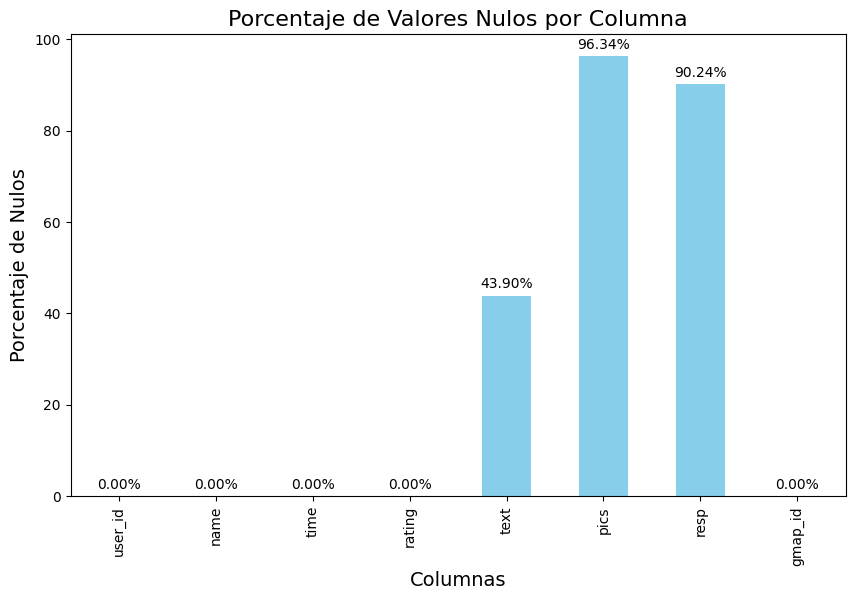

In [8]:
porcentaje_nulos = (df_muestra.isnull().sum() / len(df_muestra)) * 100

plt.figure(figsize=(10, 6))
ax = plt.subplot()
porcentaje_nulos.plot(kind="bar", color="skyblue", ax=ax)

for i, v in enumerate(porcentaje_nulos): # Agrega el porcentaje de nulos en cada columna
    ax.text(i, v + 1, f"{v:.2f}%", ha="center", va="bottom", fontsize=10, color="black")

plt.title("Porcentaje de Valores Nulos por Columna", fontsize=16)
plt.xlabel("Columnas", fontsize=14)
plt.ylabel("Porcentaje de Nulos", fontsize=14)
plt.show()

Las columnas que poseen valores nulos son las siguientes:
- text: 43.90% de valores nulos, cerca de la mitad de las reseñas no poseen texto.
- pics: 96.34% de valores nulos, la gran mayoría de las reseñas no poseen una foto que acompañe.
- resp: 90.24% de valores nulos, menos de un décimo de las reseñas cuenta con una respuesta por parte del negocio.

La presencia de valores nulos en estas columnas es válida y no representa un problema.

**Visualizamos métricas descriptivas de las columnas numéricas:**

In [9]:
df_muestra.describe()

,user_id,time,rating
count,2.640663e+06,2.640663e+06,2.640663e+06
mean,1.092969e+20,1.551473e+12,4.303740e+00
std,5.265431e+18,4.548452e+10,1.113559e+00
min,1.000000e+20,6.626016e+11,1.000000e+00
25%,1.047602e+20,1.524690e+12,4.000000e+00
50%,1.092882e+20,1.555425e+12,5.000000e+00
75%,1.138531e+20,1.581127e+12,5.000000e+00
max,1.184467e+20,1.631067e+12,5.000000e+00


- count: número de observaciones no nulas.
- mean: media aritmética de los valores.
- std: desviación estándar.
- min: valor mínimo.
- 25% (percentil 25): valor que separa el 25% más bajo de los datos.
- 50% (percentil 50 o mediana): valor que separa el 50% de los datos, es decir, el valor medio.
- 75% (percentil 75): valor que separa el 75% más bajo de los datos.
- max: valor máximo.

**Mapa de correlaciones de las variables numéricas:**

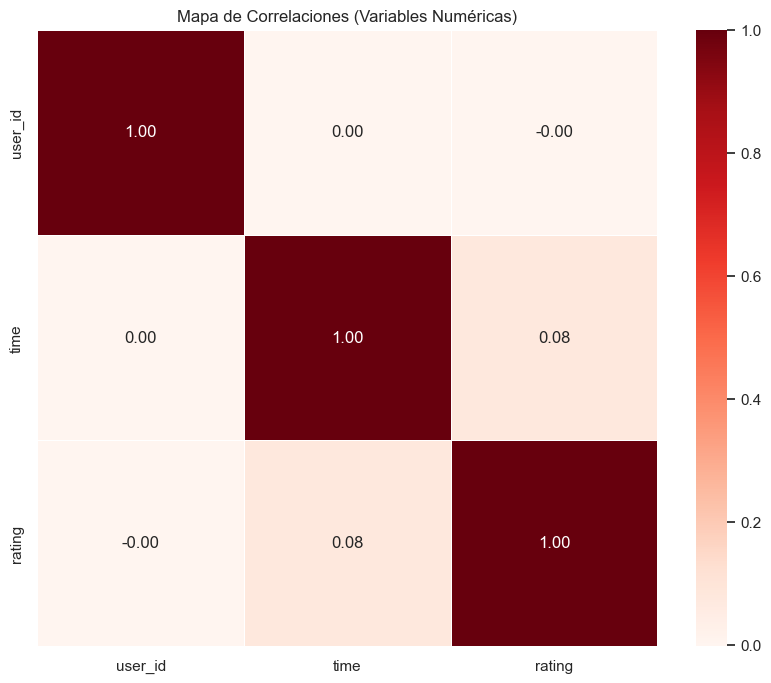

In [10]:
# Seleccionamos solo las columnas numéricas:
df_numericas = df_muestra.select_dtypes(include='number')

# Calculamos la matriz de correlación:
correlaciones = df_numericas.corr()

# Configuramos el mapa de calor con colores rojizos:
sns.set(style="white")
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='Reds', fmt='.2f', linewidths=.5)
plt.title('Mapa de Correlaciones (Variables Numéricas)')
plt.show()

No encontramos ninguna fuerte correlación.

**Buscamos valores atípicos (outliers):**

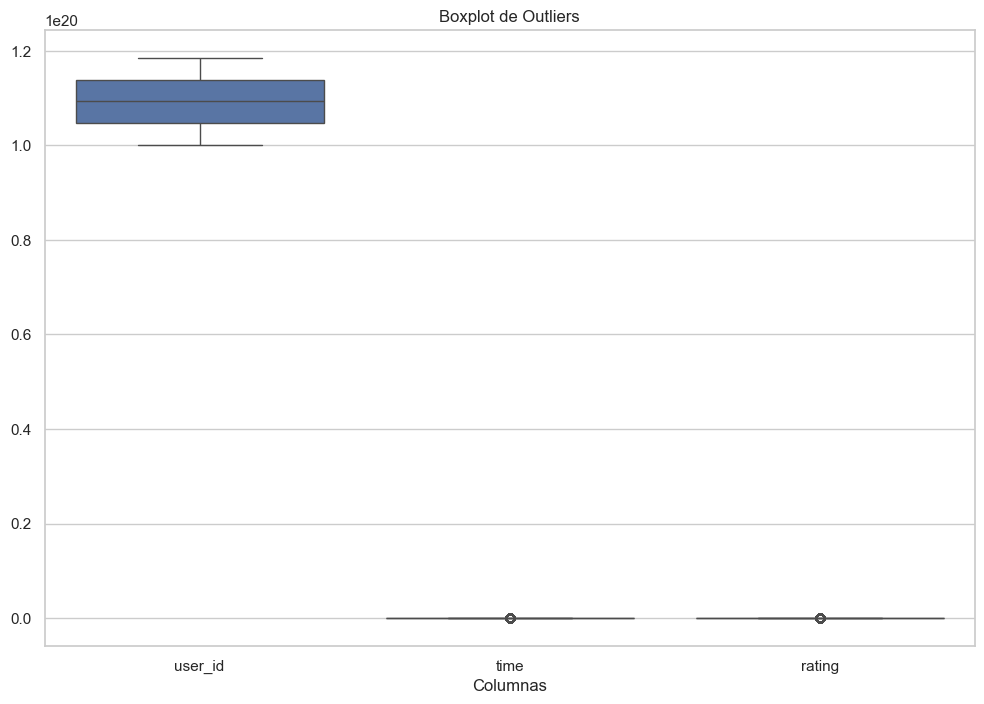

In [11]:
# Creamos un gráfico de boxplot para identificar outliers en todas las columnas:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_muestra)
plt.xlabel('Columnas')
plt.title('Boxplot de Outliers')
plt.show()

No encontramos ningún valor atípico.

**Top 10 de usuarios con mayor cantidad de reseñas realizadas:**

In [12]:
# Obtenemos la frecuencia de cada nombre en la columna "user_id":
frecuencia_user = df_muestra["user_id"].value_counts()

# Creamos un DataFrame a partir del resultado de value_counts:
df_frecuencia_user = pd.DataFrame({"user_id": frecuencia_user.index, "recuento": frecuencia_user.values}).head(10)

# Le agregamos la columna "name":
usuarios = pd.merge(df_muestra[["name", "user_id"]], df_frecuencia_user, on="user_id").sort_values(by='recuento', ascending=False)

# Filtramos aquellos usuarios que no tienen nombre ("A Google User") y ordenamos el DataFrame:
usuarios = usuarios[usuarios["name"] != "A Google User"].drop_duplicates().sort_values(by="recuento", ascending=False).reset_index(drop=True)

usuarios

,name,user_id,recuento
0,Moe Thanks -555-,1.116543e+20,346
1,Gregor J. Rothfuss,1.048192e+20,311
2,R Etheridge,1.013988e+20,306
3,Jasmine H,1.047310e+20,246
4,The Corcoran Group,1.066545e+20,245
5,Sebastian Sinisterra (CitySeby),1.032377e+20,227
6,Sebastian Sinisterra,1.032377e+20,227
7,London Eevee Tokyo Ebisu - Swanslade 恵比寿-スワンズレイド,1.010309e+20,221
8,Traci,1.087196e+20,205
9,Elk Hunter,1.116899e+20,182


El usuario que más reseñas ha realizado ha sido "Moe Thanks -555-" con 346 reseñas realizadas.

**Cantidad de reseñas positivas, neutrales y negativas según calificación (rating):**

In [13]:
# Obtenemos la frecuencia de cada rating en la columna "rating":
frecuencia_rating = df_muestra["rating"].value_counts()

# Creamos un DataFrame a partir del resultado de value_counts:
df_frecuencia_rating = pd.DataFrame({"rating": frecuencia_rating.index, "recuento": frecuencia_rating.values}).head(10)

df_frecuencia_rating

,rating,recuento
0,5,1639358
1,4,537794
2,3,236684
3,1,146946
4,2,79881


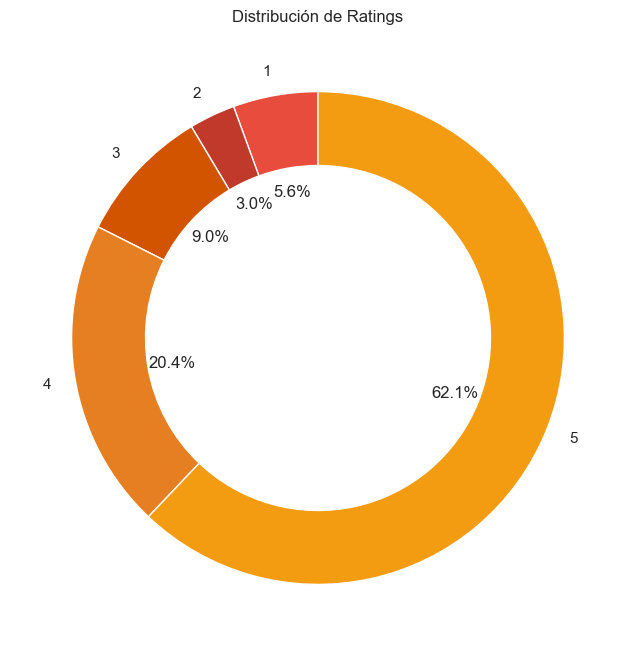

In [14]:
# Agrupamos el DataFrame por la columna "rating" y calcula el recuento para cada valor:
data = df_frecuencia_rating.groupby('rating')['recuento'].sum()

# Creamos un gráfico de dónut con etiquetas de porcentajes y colores rojizos:
colores_rojos = ['#e74c3c', '#c0392b', '#d35400', '#e67e22', '#f39c12']
plt.figure(figsize=(8, 8))
plt.pie(data, labels=data.index, autopct='%1.1f%%', colors=colores_rojos, startangle=90, wedgeprops=dict(width=0.3))
centro_circulo = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centro_circulo)
plt.title('Distribución de Ratings')
plt.show()

Podemos concluir que la mayoría de las reseñas son positivas (calificación: 4 y 5) con el 82.5%, seguido de las reseñas neutrales (calificación: 3) con un 9%, y por último las reseñas negativas (calificación: 1 y 2) con 8.6%.

<h3>Conclusiones:</h3>

El directorio "reviews-estados" contiene la información sobre las reseñas de negocios en cada estado de Estados Unidos. Se da a conocer información sobre el usuario que realizó la reseña, el momento de la reseña, y el contenido de la misma (calificación, texto, imágenes). También nos muestra, si es que existe, la respuesta del negocio a dicha crítica.

La enorme extensión de los archivos imposibilitó trabajar con todo el conjunto de datos disponibles. Debido a esto, se tomó como conjunto de muestra la data del archivo "review_New_York.csv" de 2.700.000 registros, que fue creado fusionando los 18 archivos JSON de la carpeta "review-New_York", dentro del directorio "reviews-estados".

La información se encuentra dividida en 8 columnas de las cuales 3 son de tipo numérico. En nuestro conjunto de prueba no encontramos registros en blanco, pero si habían presentes 59337 registros duplicados, lo cual representa más del 2% de los registros totales. Se encontró gran cantidad de valores nulos en las columnas "text", "pics" y "resp", estos son válidos y no representan una perdida de información. No se encontraron valores atípicos, ni una alta correlación entre las variables numéricas.